In [166]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#ANALISE AS AÇÕES DA TESLA

In [167]:
# Realizando a leitura do arquivo
base_dados = pd.read_csv("/content/drive/MyDrive/Analista de dados/Tasla_Stock_Updated_V2.csv")
base_dados

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...,...,...
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000


In [168]:
# Analisando cada coluna
base_dados.describe()

,Unnamed: 0,Open,High,Low,Close,Volume
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,1136.500000,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,656.591578,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,0.000000,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,568.250000,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,1136.500000,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,1704.750000,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,2273.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [169]:
# Pre-processamento dos dados

# Colocando a data como index
base_dados['Date'] = pd.to_datetime(base_dados['Date'])
base_dados = base_dados.set_index('Date')

In [170]:
#removendo a coluna Unnamed: 0

base_dados.drop('Unnamed: 0', axis = 1 , inplace= True)

In [171]:
#Verificando se existe algum dados em branco
base_dados.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [172]:
base_dados

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...
2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600


In [173]:
# Observando as correlações de cada coluna
base_dados.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999661,0.999530,0.999027,-0.062839
High,0.999661,1.000000,0.999537,0.999563,-0.057941
Low,0.999530,0.999537,1.000000,0.999608,-0.067421
Close,0.999027,0.999563,0.999608,1.000000,-0.061607
Volume,-0.062839,-0.057941,-0.067421,-0.061607,1.000000


<Axes: xlabel='Date'>

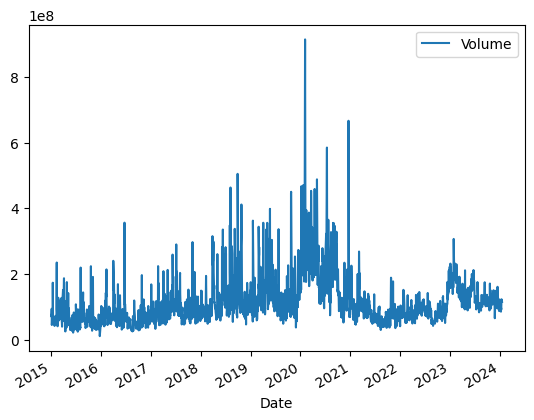

In [174]:
# Gerando gráfico de volume
base_dados[['Volume']].plot()

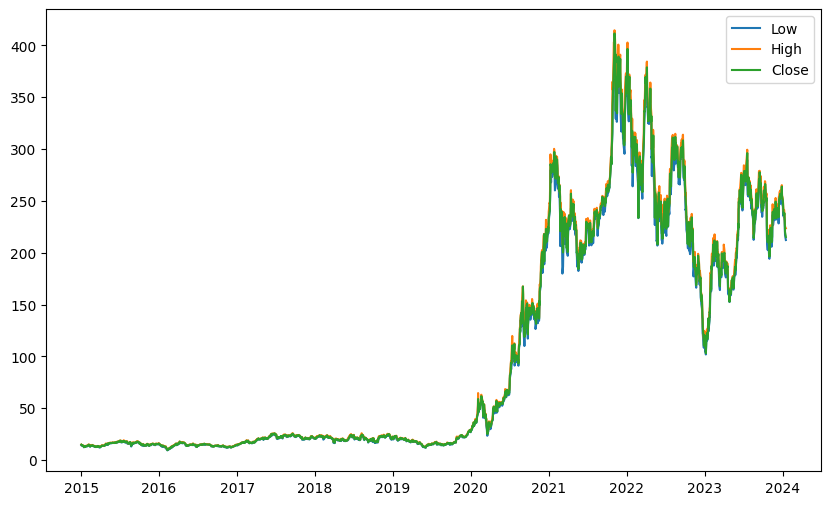

In [175]:
# Aqui será o gráfico que compara o preço de fechamento , maior e menor negociado

plt.subplots(figsize=(10, 6))
plt.plot(base_dados['Low'], label="Low")
plt.plot(base_dados['High'], label="High")
plt.plot(base_dados['Open'], label='Close')
plt.legend()

In [176]:
# Aqui eu crio os gráficos da média dos valores para facilidar a leitura
media = base_dados.resample('M').mean()
media.describe()

,Open,High,Low,Close,Volume
count,109.000000,109.000000,109.000000,109.000000,1.090000e+02
mean,104.189626,106.475813,101.720196,104.153437,1.142434e+08
std,111.281282,113.770040,108.527437,111.162902,5.803119e+07
min,11.320833,11.691600,10.920766,11.311333,4.062463e+07
25%,16.889778,17.108095,16.598794,16.860412,7.518578e+07
50%,22.970455,23.321080,22.508222,22.966349,9.679093e+07
75%,219.840953,223.639840,211.452174,218.934202,1.359114e+08
max,372.588890,382.863017,362.036666,373.554125,3.730948e+08


In [177]:
# calculando a média movel dos meus dados por mes

media_movel = base_dados.rolling(window=360).mean()
media_movel.dropna(inplace=True)
media_movel.describe()


,Open,High,Low,Close,Volume
count,1915.000000,1915.000000,1915.000000,1915.000000,1.915000e+03
mean,100.413584,102.681887,97.946506,100.369794,1.172784e+08
std,103.085559,105.478380,100.447987,102.980991,4.077353e+07
min,14.444489,14.677880,14.187983,14.433067,6.393002e+07
25%,19.033119,19.364296,18.683344,19.038168,8.193189e+07
50%,22.642020,23.188718,22.122913,22.678996,1.116075e+08
75%,222.269250,226.966176,217.271430,222.218727,1.397588e+08
max,278.659926,285.019148,271.766981,278.329185,2.020057e+08


In [178]:
media_movel.tail(30)

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-01,222.001620,226.737778,216.979018,221.999315,1.212190e+08
2023-12-04,222.016204,226.760546,217.009620,222.019009,1.212779e+08
2023-12-05,222.042204,226.808333,217.050833,222.058583,1.213984e+08
2023-12-06,222.086426,226.853722,217.098194,222.092213,1.215427e+08
2023-12-07,222.137954,226.884093,217.156009,222.118806,1.216054e+08
2023-12-08,222.164315,226.913833,217.189574,222.152435,1.216919e+08
2023-12-11,222.188815,226.908491,217.204129,222.139093,1.217363e+08
2023-12-12,222.178306,226.864074,217.183879,222.100889,1.217181e+08
2023-12-13,222.128546,226.828620,217.168805,222.114630,1.218488e+08


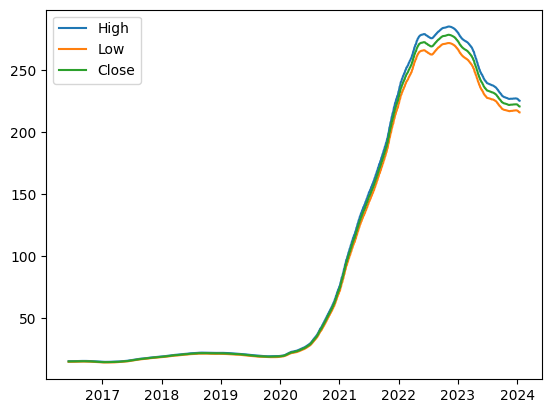

In [179]:
# Plotando o gráfico média movel dos preços das ações
plt.figsize=(10, 6)
plt.plot(media_movel['High'], label="High")
plt.plot(media_movel['Low'], label="Low")
plt.plot(media_movel['Close'], label='Close')
plt.legend()

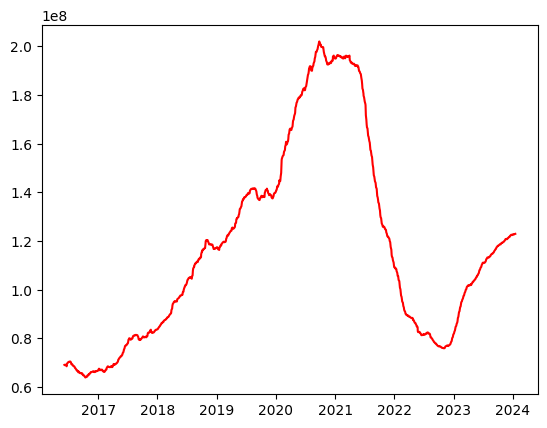

In [180]:
# Média movel do volume por mes

plt.figsize=(10, 6)
plt.plot(media_movel['Volume'], label="Volume", color="red")

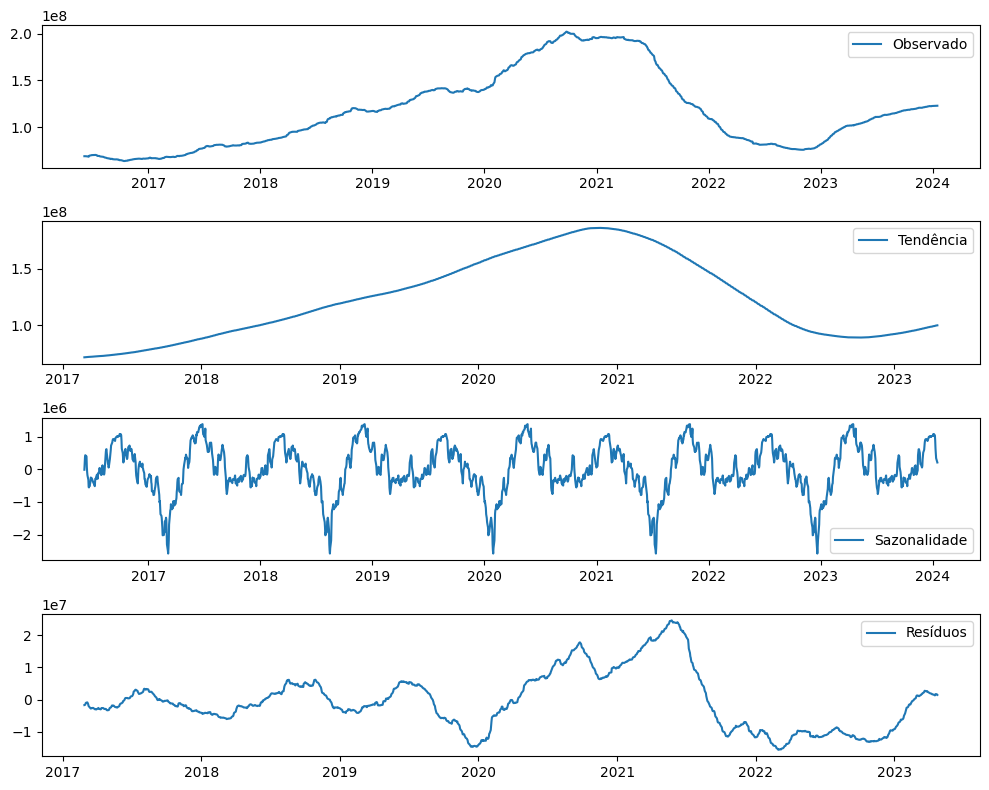

In [181]:
# Realizar a decomposição da série temporal para Volume
decomposicao = seasonal_decompose(media_movel['Volume'], model='additive', period = 365)

# Plotar os componentes da decomposição
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposicao.observed, label='Observado')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend()


plt.tight_layout()
plt.show()

#NORMALIZANDO

In [182]:
# Vamos normalizar os nossos dados de -1 a 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
padronizado = scaler.fit_transform(base_dados)

# criando uma nova base de dados padronizado
base_dados_padronizado = pd.DataFrame(padronizado)
base_dados_padronizado.columns = ["open", "high","low","Close","Volume"]
base_dados_padronizado.index = pd.to_datetime(base_dados.index)
base_dados_padronizado.tail()

,open,high,low,Close,Volume
Date,,,,,
2024-01-09,0.137474,0.131362,0.123680,0.125807,-0.809431
2024-01-10,0.122498,0.114240,0.119895,0.120712,-0.820671
2024-01-11,0.099960,0.091626,0.090016,0.087145,-0.789136
2024-01-12,0.047768,0.063964,0.048528,0.045535,-0.751469
2024-01-16,0.022991,0.054809,0.023445,0.050630,-0.768790


#CRIAÇÃO DE UM MODELO PARA PREVER VOLUME

In [183]:
#Realizando a leitura e pre-processamento
base_dados_padronizado["Volume proximo"] = base_dados_padronizado['Volume'].shift(-1)
base_volume = base_dados_padronizado[["Volume", "Volume proximo"]].dropna()

In [184]:
# Pegando os dados de teste e treino
treino = base_volume.loc[base_volume.index < "2024-01-08"]
teste = base_volume.loc[base_volume.index >= "2024-01-08"]

treino.shape, teste.shape

((2268, 2), (5, 2))

In [185]:
# verificando se não tem nenhuma informação do teste dentro da de treino
treino.index.min() , treino.index.max(), teste.index.min() , teste.index.max()

(Timestamp('2015-01-02 00:00:00'),
 Timestamp('2024-01-05 00:00:00'),
 Timestamp('2024-01-08 00:00:00'),
 Timestamp('2024-01-12 00:00:00'))

In [186]:
treino , teste

(              Volume  Volume proximo
 Date                                
 2015-01-02 -0.865305       -0.845245
 2015-01-05 -0.845245       -0.815579
 2015-01-06 -0.815579       -0.924942
 2015-01-07 -0.924942       -0.909199
 2015-01-08 -0.909199       -0.868496
 ...              ...             ...
 2023-12-29 -0.800777       -0.791836
 2024-01-02 -0.791836       -0.755468
 2024-01-03 -0.755468       -0.796318
 2024-01-04 -0.796318       -0.819009
 2024-01-05 -0.819009       -0.834976
 
 [2268 rows x 2 columns],
               Volume  Volume proximo
 Date                                
 2024-01-08 -0.834976       -0.809431
 2024-01-09 -0.809431       -0.820671
 2024-01-10 -0.820671       -0.789136
 2024-01-11 -0.789136       -0.751469
 2024-01-12 -0.751469       -0.768790)

In [187]:
# Separando o treino e teste

x_treino = treino.iloc[:,0].values
x_teste = teste.iloc[:,0].values
y_treino = treino.iloc[:,1].values
y_teste = teste.iloc[:,1].values

x_treino.shape, y_treino.shape , x_teste.shape, y_teste.shape

((2268,), (2268,), (5,), (5,))

In [188]:
# MODELO XGBoost (Extreme Gradient Boosting)

from xgboost import XGBRegressor

modelo_RGB = XGBRegressor(object="reg:squarederror", n_estimators = 1000)
modelo_RGB.fit(x_treino.reshape(-1,1), y_treino.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:32:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "object" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, object='reg:squarederror', ...)

In [189]:
# Modelo de regressão linear
from sklearn.linear_model import LinearRegression

modelo_REG = LinearRegression()
modelo_REG.fit(x_treino.reshape(-1,1), y_treino)


LinearRegression()

In [190]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

modelo_DTR = DecisionTreeRegressor()
modelo_DTR.fit(x_treino.reshape(-1,1), y_treino)

DecisionTreeRegressor()

In [191]:
from sklearn.ensemble import RandomForestRegressor
modelo_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_RFR.fit(x_treino.reshape(-1,1), y_treino)

RandomForestRegressor(random_state=42)

In [192]:
from sklearn.svm import SVR
modelo_SVR = SVR(kernel='rbf')
modelo_SVR.fit(x_treino.reshape(-1,1), y_treino)

SVR()

In [193]:
from sklearn.neural_network import MLPRegressor

# Criar e treinar o modelo de rede neural
modelo_rede_neural = MLPRegressor(hidden_layer_sizes=(3000, 1000), activation='relu', solver='adam', random_state=42)
modelo_rede_neural.fit(x_treino.reshape(-1,1), y_treino)




MLPRegressor(hidden_layer_sizes=(3000, 1000), random_state=42)

In [194]:
teste

,Volume,Volume proximo
Date,,
2024-01-08,-0.834976,-0.809431
2024-01-09,-0.809431,-0.820671
2024-01-10,-0.820671,-0.789136
2024-01-11,-0.789136,-0.751469
2024-01-12,-0.751469,-0.768790


In [195]:
modelo_rede_neural.predict([[-0.834976]])

array([-0.82264378])

In [196]:
# Verificando erro medio quadrado e definindo melhor modelo

erro_medio_XGB = ((modelos["Volume proximo"] - modelos["XGBRegressor"]) ** 2).mean()
erro_medio_Regressão_Linear = ((modelos["Volume proximo"] - modelos["Regressão Linear"]) ** 2).mean()
erro_medio_DecisionTreeRegressor = ((modelos["Volume proximo"] - modelos["DecisionTreeRegressor"]) ** 2).mean()
erro_medio_RandomForestRegressor = ((modelos["Volume proximo"] - modelos["RandomForestRegressor"]) ** 2).mean()
erro_medio_SVR = ((modelos["Volume proximo"] - modelos["SVR"]) ** 2).mean()
erro_medio_rede_neural = ((modelos["Volume proximo"] - modelos["rede_neural"]) ** 2).mean()

In [197]:
erro_medio_Regressão_Linear,erro_medio_SVR,erro_medio_rede_neural

(0.0009179706187474754, 0.0009341933880529947, 0.0009650965797411662)